In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Reading the dataset
data= pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# checking the shape of the data
data.shape

(99999, 226)

In [5]:
# there 99999 rows and 226 columns in the data

In [6]:
# feature type summary
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [7]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
# Cheking percent of missing values in columns
pd.DataFrame(data.isnull().sum()*100/data.shape[0],columns=['null values']).sort_values(by='null values',ascending=False)

,null values
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


In [9]:
## Imputing the missing values 

In [10]:
# some recharge columns have minimum value of 1 while some don't
recharge_column=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

data[recharge_column].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [11]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [12]:
# In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer 
# didn't recharge their numbere that month

In [13]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_imputation = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [14]:
# impute missing values with 0
data[zero_imputation]=data[zero_imputation].apply(lambda x: x.fillna(0))

In [15]:
# checking the missing values percentage again
pd.DataFrame(data.isnull().sum()*100/data.shape[0],columns=['null values']).sort_values(by='null values',ascending=False)

,null values
fb_user_6,74.846748
night_pck_user_6,74.846748
count_rech_3g_6,74.846748
arpu_2g_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
arpu_3g_6,74.846748
arpu_3g_7,74.428744
fb_user_7,74.428744
arpu_2g_7,74.428744


In [16]:
# dropping columns which have missing values greater than 70%

In [17]:
missing_values_columns=pd.DataFrame(data.isnull().sum()*100/data.shape[0],columns=['null values']).sort_values(by='null values',ascending=False)

In [18]:
drop_columns=missing_values_columns[missing_values_columns['null values']>70].index

In [19]:
data.drop(drop_columns, axis=1, inplace=True)

In [20]:
data.shape

(99999, 198)

In [21]:
# Deleting the date columns as the date columns are not required in our analysis

In [22]:
# List the date columns
date_cols=[i for i in data.columns.to_list() if 'date' in i]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [23]:
# Dropping date columns
data= data.drop(date_cols, axis=1)

In [24]:
#Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on 
#the data analysis

In [25]:
# Drop circle_id column
data=data.drop('circle_id',axis=1)

In [26]:
data.shape

(99999, 189)

In [27]:
unique_columns=pd.DataFrame(data.nunique(),columns=['unique'])

In [28]:
unique_columns[unique_columns['unique']==1]

,unique
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1
std_og_t2c_mou_8,1
std_og_t2c_mou_9,1
std_ic_t2o_mou_6,1
std_ic_t2o_mou_7,1
std_ic_t2o_mou_8,1


In [29]:
# Checking cols with only 1 value in them. These are not useful in any analysis since they wont explain

In [30]:
unique_columns_drop=unique_columns[unique_columns['unique']==1].index

In [31]:
unique_columns_drop

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], dtype='object')

In [32]:
data.drop(unique_columns_drop,axis=1,inplace=True)

In [33]:
data.shape

(99999, 178)

In [34]:
# Cheking the percentage of missing values in columns again
missing_values=pd.DataFrame(data.isnull().sum()*100/data.shape[0],columns=['null values']).sort_values(by='null values',ascending=False)

In [35]:
data.shape

(99999, 178)

In [36]:
missing_values

,null values
std_og_t2t_mou_9,7.745077
roam_ic_mou_9,7.745077
loc_ic_mou_9,7.745077
loc_og_t2c_mou_9,7.745077
std_og_t2m_mou_9,7.745077
loc_og_t2f_mou_9,7.745077
std_og_t2f_mou_9,7.745077
std_og_mou_9,7.745077
loc_og_t2m_mou_9,7.745077
std_ic_t2f_mou_9,7.745077


### filtering high value customers

In [37]:
# Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum

In [38]:
data['avg_rech_amt_6_7']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [39]:
# Finding the 70th percentile of the avg_rech_amt_6_7

In [40]:
X= data['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [41]:
# Filter the customers, who have recharged more than or equal to 368.5

In [42]:
hvc=data[data['avg_rech_amt_6_7']>=X]
hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,

In [43]:
hvc.shape

(30011, 179)

In [44]:
# we have 30011 rows after filtering

In [45]:
pd.DataFrame(hvc.isnull().sum()*100/hvc.shape[0],columns=['null values']).sort_values(by='null values',ascending=False)

,null values
std_og_t2t_mou_9,5.677918
roam_ic_mou_9,5.677918
loc_ic_mou_9,5.677918
loc_og_t2c_mou_9,5.677918
std_og_t2m_mou_9,5.677918
loc_og_t2f_mou_9,5.677918
std_og_t2f_mou_9,5.677918
std_og_mou_9,5.677918
loc_og_t2m_mou_9,5.677918
std_ic_t2f_mou_9,5.677918


#### Handling missing values in rows

In [46]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = hvc[(hvc.isnull().sum(axis=1)) > (len(hvc.columns)//2)]
df_missing_rows_50.shape

(114, 179)

In [47]:
# Deleting the rows having more than 50% missing values
hvc=hvc.drop(df_missing_rows_50.index)
hvc.shape

(29897, 179)

In [48]:
# Checking the missing values in columns again
hvc_missing_columns = (round(((hvc.isnull().sum()/len(hvc.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
hvc_missing_columns

,null
std_og_t2t_mou_9,5.32
roam_ic_mou_9,5.32
loc_ic_mou_9,5.32
loc_og_t2c_mou_9,5.32
std_og_t2m_mou_9,5.32
loc_og_t2f_mou_9,5.32
std_og_t2f_mou_9,5.32
std_og_mou_9,5.32
loc_og_t2m_mou_9,5.32
std_ic_t2f_mou_9,5.32


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together

In [49]:
# Listing the columns of MOU Sep(9)
print(((hvc_missing_columns[hvc_missing_columns['null'] == 5.32]).index).to_list())

['std_og_t2t_mou_9', 'roam_ic_mou_9', 'loc_ic_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'loc_og_t2m_mou_9', 'std_ic_t2f_mou_9', 'spl_ic_mou_9', 'loc_og_t2t_mou_9', 'isd_og_mou_9', 'std_ic_mou_9', 'spl_og_mou_9', 'og_others_9', 'roam_og_mou_9', 'std_ic_t2m_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'loc_ic_t2f_mou_9', 'loc_ic_t2m_mou_9', 'onnet_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'loc_ic_t2t_mou_9', 'offnet_mou_9']


In [50]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
hvc_null_mou_9 = hvc[(hvc['loc_og_t2m_mou_9'].isnull()) & (hvc['loc_ic_t2f_mou_9'].isnull()) & (hvc['roam_og_mou_9'].isnull()) & (hvc['std_ic_t2m_mou_9'].isnull()) &
  (hvc['loc_og_t2t_mou_9'].isnull()) & (hvc['std_ic_t2t_mou_9'].isnull()) & (hvc['loc_og_t2f_mou_9'].isnull()) & (hvc['loc_ic_mou_9'].isnull()) &
  (hvc['loc_og_mou_9'].isnull()) & (hvc['std_og_t2t_mou_9'].isnull()) & (hvc['roam_ic_mou_9'].isnull()) &
  (hvc['loc_ic_t2m_mou_9'].isnull()) & (hvc['std_og_t2m_mou_9'].isnull()) & (hvc['loc_ic_t2t_mou_9'].isnull()) & (hvc['std_og_t2f_mou_9'].isnull()) & 
  (hvc['og_others_9'].isnull()) & (hvc['std_og_mou_9'].isnull()) & (hvc['spl_og_mou_9'].isnull()) & 
  (hvc['std_ic_t2f_mou_9'].isnull()) & (hvc['isd_og_mou_9'].isnull()) & (hvc['std_ic_mou_9'].isnull()) & (hvc['offnet_mou_9'].isnull()) & 
  (hvc['isd_ic_mou_9'].isnull()) & (hvc['ic_others_9'].isnull()) & (hvc['onnet_mou_9'].isnull()) & 
  (hvc['spl_ic_mou_9'].isnull())]

hvc_null_mou_9.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN

In [51]:
hvc_null_mou_9.shape

(1590, 179)

In [52]:
# Deleting the records for which MOU for Sep(9) are null
hvc=hvc.drop(hvc_null_mou_9.index)

In [53]:
# Again Cheking percent of missing values in columns
hvc_missing_columns = (round(((hvc.isnull().sum()/len(hvc.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
hvc_missing_columns

,null
loc_og_t2f_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_t2c_mou_8,0.55
std_og_t2t_mou_8,0.55
isd_ic_mou_8,0.55
loc_ic_t2m_mou_8,0.55
spl_og_mou_8,0.55
std_ic_mou_8,0.55
ic_others_8,0.55
loc_og_t2m_mou_8,0.55


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [54]:
# Listing the columns of MOU Aug(8)
print(((hvc_missing_columns[hvc_missing_columns['null'] == 0.55]).index).to_list())

['loc_og_t2f_mou_8', 'roam_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'isd_ic_mou_8', 'loc_ic_t2m_mou_8', 'spl_og_mou_8', 'std_ic_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'loc_ic_mou_8', 'og_others_8', 'std_ic_t2m_mou_8', 'std_og_mou_8', 'offnet_mou_8', 'spl_ic_mou_8', 'isd_og_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2t_mou_8']


In [55]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
hvc_null_mou_8 = hvc[(hvc['loc_og_t2m_mou_8'].isnull()) & (hvc['loc_ic_t2f_mou_8'].isnull()) & (hvc['roam_og_mou_8'].isnull()) & (hvc['std_ic_t2m_mou_8'].isnull()) &
  (hvc['loc_og_t2t_mou_8'].isnull()) & (hvc['std_ic_t2t_mou_8'].isnull()) & (hvc['loc_og_t2f_mou_8'].isnull()) & (hvc['loc_ic_mou_8'].isnull()) &
  (hvc['loc_og_t2c_mou_8'].isnull()) & (hvc['loc_og_mou_8'].isnull()) & (hvc['std_og_t2t_mou_8'].isnull()) & (hvc['roam_ic_mou_8'].isnull()) &
  (hvc['loc_ic_t2m_mou_8'].isnull()) & (hvc['std_og_t2m_mou_8'].isnull()) & (hvc['loc_ic_t2t_mou_8'].isnull()) & (hvc['std_og_t2f_mou_8'].isnull()) & 
 (hvc['og_others_8'].isnull()) & (hvc['std_og_mou_8'].isnull()) & (hvc['spl_og_mou_8'].isnull()) & 
  (hvc['std_ic_t2f_mou_8'].isnull()) & (hvc['isd_og_mou_8'].isnull()) & (hvc['std_ic_mou_8'].isnull()) & (hvc['offnet_mou_8'].isnull()) & 
  (hvc['isd_ic_mou_8'].isnull()) & (hvc['ic_others_8'].isnull()) &(hvc['onnet_mou_8'].isnull()) & 
  (hvc['spl_ic_mou_8'].isnull())]

hvc_null_mou_8.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.0,0.0,NaN

In [56]:
# Deleting the records for which MOU for Aug(8) are null
hvc=hvc.drop(hvc_null_mou_8.index)

In [57]:
# Again cheking percent of missing values in columns
hvc_missing_columns = (round(((hvc.isnull().sum()/len(hvc.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
hvc_missing_columns

,null
std_ic_t2t_mou_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
std_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44
std_og_t2f_mou_6,0.44
std_og_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together

In [58]:
# Listing the columns of MOU Jun(6)
print(((hvc_missing_columns[hvc_missing_columns['null'] == 0.44]).index).to_list())

['std_ic_t2t_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'ic_others_6', 'isd_ic_mou_6', 'loc_og_t2f_mou_6', 'isd_og_mou_6', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'roam_ic_mou_6', 'onnet_mou_6', 'roam_og_mou_6']


In [59]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
hvc_null_mou_6 = hvc[(hvc['loc_og_t2m_mou_6'].isnull()) & (hvc['loc_ic_t2f_mou_6'].isnull()) & (hvc['roam_og_mou_6'].isnull()) & (hvc['std_ic_t2m_mou_6'].isnull()) &
  (hvc['loc_og_t2t_mou_6'].isnull()) & (hvc['std_ic_t2t_mou_6'].isnull()) & (hvc['loc_og_t2f_mou_6'].isnull()) & (hvc['loc_ic_mou_6'].isnull()) &
  (hvc['loc_og_t2c_mou_6'].isnull()) & (hvc['loc_og_mou_6'].isnull()) & (hvc['std_og_t2t_mou_6'].isnull()) & (hvc['roam_ic_mou_6'].isnull()) &
  (hvc['loc_ic_t2m_mou_6'].isnull()) & (hvc['std_og_t2m_mou_6'].isnull()) & (hvc['loc_ic_t2t_mou_6'].isnull()) & (hvc['std_og_t2f_mou_6'].isnull()) & 
   (hvc['og_others_6'].isnull()) & (hvc['std_og_mou_6'].isnull()) & (hvc['spl_og_mou_6'].isnull()) & 
  (hvc['std_ic_t2f_mou_6'].isnull()) & (hvc['isd_og_mou_6'].isnull()) & (hvc['std_ic_mou_6'].isnull()) & (hvc['offnet_mou_6'].isnull()) & 
  (hvc['isd_ic_mou_6'].isnull()) & (hvc['ic_others_6'].isnull()) & (hvc['onnet_mou_6'].isnull()) & 
  (hvc['spl_ic_mou_6'].isnull())]

hvc_null_mou_6.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.

In [60]:
# Deleting the records for which MOU for Jun(6) are null
hvc= hvc.drop(hvc_null_mou_6.index)

In [61]:
# Again cheking percent of missing values in columns
hvc_missing_columns=(round(((hvc.isnull().sum()/len(hvc.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
hvc_missing_columns

,null
std_og_t2f_mou_7,0.12
loc_og_t2t_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
std_og_t2t_mou_7,0.12
std_og_t2m_mou_7,0.12
std_og_mou_7,0.12
isd_og_mou_7,0.12
spl_og_mou_7,0.12


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [62]:
# Listing the columns of MOU Jul(7)
print(((hvc_missing_columns[hvc_missing_columns['null'] == 0.12]).index).to_list())

['std_og_t2f_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'ic_others_7', 'loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'loc_og_t2m_mou_7', 'std_ic_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7']


In [63]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
hvc_null_mou_7 = hvc[(hvc['loc_og_t2m_mou_7'].isnull()) & (hvc['loc_ic_t2f_mou_7'].isnull()) & (hvc['roam_og_mou_7'].isnull()) & (hvc['std_ic_t2m_mou_7'].isnull()) &
  (hvc['loc_og_t2t_mou_7'].isnull()) & (hvc['std_ic_t2t_mou_7'].isnull()) & (hvc['loc_og_t2f_mou_7'].isnull()) & (hvc['loc_ic_mou_7'].isnull()) &
  (hvc['loc_og_t2c_mou_7'].isnull()) & (hvc['loc_og_mou_7'].isnull()) & (hvc['std_og_t2t_mou_7'].isnull()) & (hvc['roam_ic_mou_7'].isnull()) &
  (hvc['loc_ic_t2m_mou_7'].isnull()) & (hvc['std_og_t2m_mou_7'].isnull()) & (hvc['loc_ic_t2t_mou_7'].isnull()) & (hvc['std_og_t2f_mou_7'].isnull()) & 
  (hvc['og_others_7'].isnull()) & (hvc['std_og_mou_7'].isnull()) & (hvc['spl_og_mou_7'].isnull()) & 
  (hvc['std_ic_t2f_mou_7'].isnull()) & (hvc['isd_og_mou_7'].isnull()) & (hvc['std_ic_mou_7'].isnull()) & (hvc['offnet_mou_7'].isnull()) & 
  (hvc['isd_ic_mou_7'].isnull()) & (hvc['ic_others_7'].isnull()) & (hvc['onnet_mou_7'].isnull()) & 
  (hvc['spl_ic_mou_7'].isnull())]

hvc_null_mou_7.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.0,0.0,1.0,1.0,0.0,0.0,154.0,175.0,0.0,0.0,154.0,175.0,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,

In [64]:
# Deleting the records for which MOU for Jul(7) are null
hvc=hvc.drop(hvc_null_mou_7.index)

In [65]:
# Again cheking percent of missing values in columns
hvc_missing_columns=(round(((hvc.isnull().sum()/len(hvc.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
hvc_missing_columns

,null
mobile_number,0.0
last_day_rch_amt_7,0.0
isd_ic_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_9,0.0
ic_others_6,0.0
ic_others_7,0.0
ic_others_8,0.0
ic_others_9,0.0
total_rech_num_6,0.0


In [66]:
hvc.shape

(27991, 179)

In [67]:
# Checking percentage of rows we have lost while handling the missing values
round((1-(len(hvc.index)/30011)),2)

0.07

In [68]:
#We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

### derive churn

In [69]:
# Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [70]:
hvc['churn']=np.where((hvc['total_ic_mou_9']==0)&(hvc['total_og_mou_9']==0)&(hvc['vol_2g_mb_9']==0)&(hvc['vol_3g_mb_9']==0),1,0)

In [71]:
hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18

In [72]:
# Deleting all the attributes corresponding to the churn phase

In [73]:
# List the columns for churn month(9)
col_9=[]
for i in hvc.columns.to_list():
    if '_9' in i:
        col_9.append(i)

In [74]:
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [75]:
# Deleting the churn month columns
hvc= hvc.drop(col_9,axis=1)    

In [76]:
# Dropping sep_vbc_3g column
hvc=hvc.drop('sep_vbc_3g',axis=1)

In [77]:
## Checking churn percentage

In [78]:
hvc['churn'].value_counts(normalize=True)

0    0.966096
1    0.033904
Name: churn, dtype: float64

In [79]:
round(100*(hvc['churn'].mean()),2)

3.39

In [80]:
# There is very little percentage of churn rate. We will have to take care of the class imbalance

### Outlier treatment

In [81]:
##  converting mobile_number and churn datatype to object

In [82]:
hvc['mobile_number']=hvc['mobile_number'].astype(object)
hvc['churn']=hvc['churn'].astype(object)

In [83]:
# List only the numeric columns
numeric_cols=hvc.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6_7'], dtype='object', length=134)


In [84]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = hvc[col].quantile(0.10)
    q3 = hvc[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    hvc1=hvc.loc[(hvc[col]>range_low)&(hvc[col]<range_high)]


In [85]:
hvc1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,

In [86]:
hvc1.shape

(27705, 136)

### Deriving new features

In [87]:
# List the columns of total mou, rech_num and rech_amt
[total for total in hvc1.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

##### Deriving new column decrease_mou_action

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [88]:
# Total mou at good phase incoming and outgoing
hvc1['total_mou_good']=(hvc1['total_og_mou_6']+hvc1['total_ic_mou_6'])

In [89]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
hvc1['avg_mou_action']=(hvc1['total_og_mou_7']+hvc1['total_og_mou_8']+hvc1['total_ic_mou_7']+hvc1['total_ic_mou_8'])/2

In [90]:
# Difference avg_mou_good and avg_mou_action
hvc1['diff_mou']=hvc1['avg_mou_action']-hvc1['total_mou_good']

In [91]:
# Checking whether the mou has decreased in action phase
hvc1['decrease_mou_action']=np.where((hvc1['diff_mou']<0),1,0)

In [92]:
hvc1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.2

#### Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [93]:
# Avg rech number at action phase
hvc1['avg_rech_num_action']=(hvc1['total_rech_num_7']+hvc1['total_rech_num_8'])/2

In [94]:
# Difference total_rech_num_6 and avg_rech_action
hvc1['diff_rech_num']=hvc1['avg_rech_num_action']-hvc1['total_rech_num_6']

In [95]:
# Checking if rech_num has decreased in action phase
hvc1['decrease_rech_num_action']=np.where((hvc1['diff_rech_num']<0),1,0)

In [96]:
hvc1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93

#### Deriving new column decrease_rech_amt_action

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [97]:
# Avg rech_amt in action phase
hvc1['avg_rech_amt_action']=(hvc1['total_rech_amt_7']+hvc1['total_rech_amt_8'])/2

In [98]:
# Difference of action phase rech amt and good phase rech amt
hvc1['diff_rech_amt']=hvc1['avg_rech_amt_action']-hvc1['total_rech_amt_6']

In [99]:
# Checking if rech_amt has decreased in action phase
hvc1['decrease_rech_amt_action']=np.where((hvc1['diff_rech_amt']<0),1,0)

In [100]:
hvc1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.8

#### Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [101]:
# VBC in action phase
hvc1['avg_vbc_3g_action']=(hvc1['jul_vbc_3g']+hvc1['aug_vbc_3g'])/2

In [102]:
# Difference of good and action phase VBC
hvc1['diff_vbc']=hvc1['avg_vbc_3g_action']-hvc1['jun_vbc_3g']

In [103]:
# Checking whether the VBC has decreased on the action month
hvc1['decrease_vbc_action']=np.where(hvc1['diff_vbc']<0,1,0)

#### Deriving new column decrease_arpu_action

This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [104]:
# ARUP in action phase
hvc1['avg_arpu_action']=(hvc1['arpu_7']+hvc1['arpu_8'])/2

In [105]:
# Difference of good and action phase ARPU
hvc1['diff_arpu']=hvc1['avg_arpu_action']-hvc1['arpu_6']

In [106]:
# Checking whether the arpu has decreased on the action month
hvc1['decrease_arpu_action']=np.where(hvc1['diff_arpu']<0,1,0)

In [107]:
hvc1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,465.840,343.680,0,314.7925,-63.9285,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,0.000,0.000,0,399.4655,-93.3805,1
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315

## EDA

In [108]:
# Univariate analysis

In [109]:
#Churn rate on the basis whether the customer decreased her/his MOU in action month

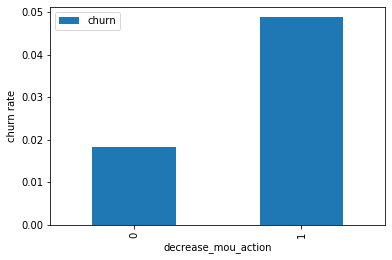

In [110]:
hvc1['churn']=hvc1['churn'].astype('int64')
hvc1.pivot_table(values='churn', index='decrease_mou_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [111]:
# churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase

In [112]:
## Churn rate on the basis whether the customer decreased her/his volume based cost in action month

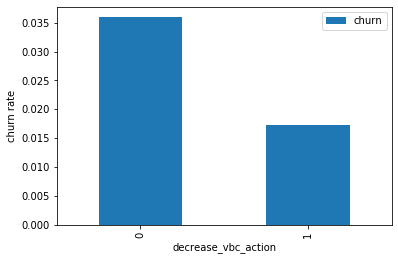

In [113]:
hvc1.pivot_table(values='churn',index='decrease_vbc_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [114]:
## churn rate is more for the customers, whose volume based cost in action month is increased

In [115]:
# Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

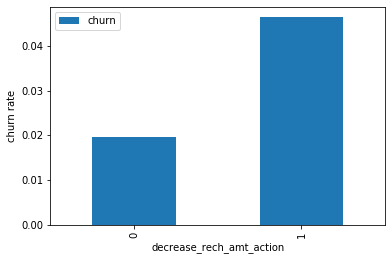

In [116]:
hvc1.pivot_table(values='churn',index='decrease_rech_amt_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [117]:
#  churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase

In [118]:
## Churn rate on the basis whether the customer decreased her/his number of recharge in action month

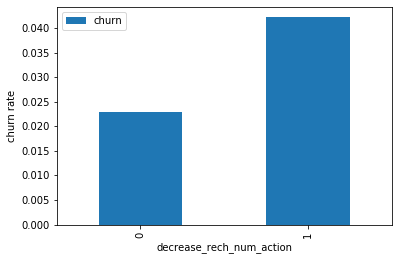

In [119]:
hvc1.pivot_table(values='churn',index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [120]:
# the churn rate is more for the customers whose number of recharge in the action phase is lesser than the number in good phase

In [121]:
## bivariate analysis

In [122]:
## Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

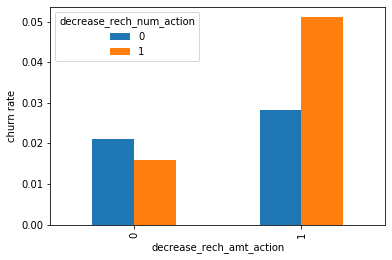

In [123]:
hvc1.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [124]:
# churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase 
# than the good phase.

In [125]:
# Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

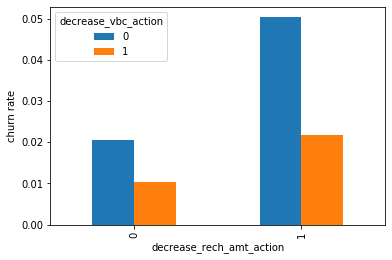

In [126]:
hvc1.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [127]:
# recharge amount and number of recharge in action month

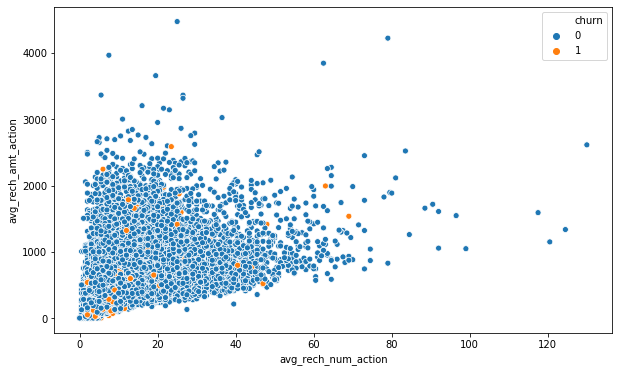

In [128]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=hvc1,x='avg_rech_num_action',y='avg_rech_amt_action', hue='churn')

In [129]:
# we can see that more the number of recharge, more the amount of the recharge.

In [130]:
#Dropping few derived columns, which are not required in further analysis

In [131]:
hvc1=hvc1.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action','diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'],axis=1)

### Train-Test Split

In [132]:
# Import library
from sklearn.model_selection import train_test_split

In [133]:
# Putting feature variables into X
X=hvc1.drop(['mobile_number','churn'],axis=1)

In [134]:
# Putting target variable to y
y=hvc1['churn']

In [135]:
# Splitting data into train and test set 80:20
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=100)

In [136]:
y_train.value_counts(normalize=True)

0    0.966658
1    0.033342
Name: churn, dtype: float64

In [137]:
y_test.value_counts(normalize=True)

0    0.965169
1    0.034831
Name: churn, dtype: float64

## dealing with the data imbalance

In [138]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=27)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

42850

#### Feature scaling 

In [139]:
# Standardization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [140]:
# List of the numeric columns
col= X_resampled_smt.columns.to_list()
# Removing the derived binary columns 
col.remove('decrease_mou_action')
col.remove('decrease_rech_num_action')
col.remove('decrease_rech_amt_action')
col.remove('decrease_arpu_action')
col.remove('decrease_vbc_action')

In [141]:
# Fit the data into scaler and transform
X_resampled_smt[col] = scaler.fit_transform(X_resampled_smt[col])

In [142]:
X_resampled_smt.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_vbc_action,decrease_arpu_action
0,0.141150,-0.522529,-0.276530,0.107154,-0.662072,-0.465836,-0.211735,-0.636224,0.317007,-0.254593,-0.001127,-0.235120,-0.300660,-0.375068,-0.412942,-0.263760,-0.312258,-0.251386,0.484727,-0.191046,-0.399420,-0.256695,-0.267326,-0.244723,-0.190671,-0.267844,-0.244565,0.129343,-0.335777,-0.418852,0.255296,-0.528597,-0.338094,-0.342669,-0.503901,0.650478,-0.144026,-0.139423,-0.119307,-0.048257,-0.731156,0.214036,-0.08088,-0.092596,-0.061630,-0.347827,-0.362911,-0.017035,-0.346162,-0.015591,-0.013735,-0.000459,-0.859920,-0.011494,-0.203433,-0.266513,-0.242789,-0.380756,-0.272715,-0.437673,-0.290725,-0.271009,-0.150061,-0.408922,-0.363864,-0.440485,-0.174892,-0.159906,0.078562,-0.165008,0.369690,-0.117349,-0.136222,-0.137399,-0.110665,-0.235198,0.121768,-0.063876,-0.475416,-0.286827,-0.420882,-0.366075,-0.089693,-0.192225,-0.151598,-0.153443,-0.126614,-0.099362,-0.121236,-0.081488,0.192675,-0.445703,0.305239,0.044608,-0.726239,-0.235515,0.055632,0.024391,0.030298,0.601847,-0.811197,-0.626537,3.443606,2.147404,1.690162,1.462581,1.412643,-0.118713,2.195488,1.252233,0.297677,-0.093161,0.696947,1.750805,0.514773,1.204819,-0.241370,3.234952,3.103782,-0.232664,4.021618,2.354020,2.448800,-0.224457,-0.221564,-0.216246,-0.141178,-0.136906,-0.114219,-0.361382,-0.236178,-0.265455,0.110913,1,1,1,1,1
1,-1.427611,4.431269,3.257204,-0.658670,-0.236413,-0.004499,-0.776244,2.524159,2.731717,-0.254593,-0.253188,-0.304587,-0.300660,-0.375068,-0.431153,-0.201554,0.272880,0.198974,-0.530009,1.106040,0.288697,-0.276153,-0.267326,-0.244723,-0.190671,-0.267844,-0.244565,-0.477769,0.845607,0.290751,-0.570624,-0.320251,-0.041470,-0.512743,2.294742,3.086990,-0.144026,-0.139423,-0.119307,-0.772128,1.368335,2.063449,-0.08088,-0.092596,-0.061630,-0.347827,-0.362911,-0.290147,-0.346162,-0.015591,-0.013735,-0.970677,1.670284,1.938669,-0.410250,0.193343,0.156517,-0.481881,0.744683,0.256482,-0.290725,-0.271009,-0.257692,-0.583110,0.570205,0.219382,-0.21

Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [143]:
# Transform the test set
X_test[col] = scaler.transform(X_test[col])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_vbc_action,decrease_arpu_action
5704,0.244732,-0.268417,1.006801,-0.725533,-0.690221,-0.476694,0.482561,0.307486,2.323346,-0.077009,-0.253188,-0.304587,0.215724,-0.375068,-0.431153,-0.278740,-0.283194,-0.106539,0.027378,0.005913,0.033893,-0.087220,-0.267326,-0.244723,0.036130,-0.267844,-0.244565,-0.161484,-0.195343,-0.055035,-0.610843,-0.570480,-0.420245,0.346366,0.370105,2.701659,-0.144026,-0.139423,-0.119307,-0.214961,-0.151924,1.550028,-0.08088,-0.092596,-0.06163,1.058243,0.774176,0.757870,0.315072,-0.015591,-0.013735,-0.254504,-0.209465,1.353920,-0.356453,-0.094828,0.281825,0.088982,-0.112784,0.515861,-0.290725,-0.271009,-0.194256,-0.155941,-0.166328,0.468165,-0.215290,-0.200524,-0.187374,0.113768,-0.185604,-0.166491,-0.136222,-0.137399,-0.110665,-0.077989,-0.265739,-0.233877,-0.193998,-0.204274,0.286458,-0.366075,-0.089693,-0.192225,-0.151598,0.285456,-0.126614,-0.099362,-0.121236,-0.081488,-0.156524,0.259602,1.306538,0.088041,-0.236782,0.817774,0.055632,-0.173341,0.030298,0.175978,0.369299,-0.351569,1.255554,2.147404,2.714264,1.462581,0.052039,0.309260,1.153118,0.542304,1.078028,3.307507,2.177078,-0.097888,-0.263079,-0.063653,0.506966,3.234952,-0.251425,-0.232664,0.457077,2.354020,2.448800,-0.224457,-0.221564,-0.216246,1.314777,1.218862,2.525640,0.225237,0.017984,0.194717,-0.259275,0,0,1,0,1
64892,0.048688,-0.779500,-0.158104,-0.734323,-0.698074,-0.502279,-0.358993,-0.577526,-0.256226,0.023647,-0.253188,-0.304587,-0.120103,-0.375068,-0.431153,-0.278903,-0.303256,-0.174443,-0.300799,-0.204398,-0.296121,-0.261716,-0.267326,-0.244723,-0.190671,-0.267844,-0.244565,-0.379647,-0.338189,-0.306711,-0.619984,-0.570480,-0.415957,-0.232154,-0.436808,-0.040625,-0.144026,-0.139423,-0.104334,-0.616819,-0.714324,-0.306121,-0.08088,-0.092596,-0.06163,-0.327350,-0.362911,-0.290147,-0.346162,-0.015591,-0.013735,-0.776174,-0.844824,-0.422528,-0.107378,-0.347398,-0.187462,0.377713,0.199481,0.240828,-0.276064,-0.257627,-0.235144,0.172991,-0.078641,0.045860,-0.21

### Logistic regression 

In [144]:
##### Importing stats model
import statsmodels.api as sm

In [145]:
# Instantiate the model
# Adding the constant to X_train
lreg=sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt)),family=sm.families.Binomial())

In [146]:
# Fit the model
lreg=lreg.fit().summary()

In [147]:
lreg

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42711
Model Family:                Binomial   Df Model:                          138
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Jun 2021   Deviance:                          nan
Time:                        23:15:06   Pearson chi2:                 2.29e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     9242.8796   1.14e+05      0.081      0.935   -2.14e+05    2.32e+05
arpu_6                      -0.1537      0.100     -1.536      0.124      -0.350       0.042
arpu_7                       0.1706      0.107      1.592      0.111      -0.039       0.381
arpu_8                       0.5816      0.136      4.276      0.000       0.315       0.848
onnet_mou_6                 19.4237      4.814      4.035      0.000       9.988      28.860
onnet_mou_7                 -1.9562      2.332     -0.839      0.401      -6.526       2.614
onnet_mou_8                 -4.9142      2.543     -1.932      0.053      -9.898       0.070
offnet_mou_6                18.2385      4.535      4.022      0.000       9.350      27.127
offnet_mou_7                 0.1805      2.224      0.081      0.935      -4.178       4.539
offnet_mou_8                -6.6798      2.642     -2.528      0.011     -11.858      -1.502
roam_ic_mou_6                0.0724      0.045      1.616      0.106      -0.015       0.160
roam_ic_mou_7               -0.0023      0.067     -0.034      0.973      -0.134       0.130
roam_ic_mou_8                0.2712      0.050      5.395      0.000       0.173       0.370
roam_og_mou_6               -6.2146      1.526     -4.074      0.000      -9.205      -3.225
roam_og_mou_7                0.2806      0.609      0.461      0.645      -0.913       1.474
roam_og_mou_8                1.8360      0.744      2.469      0.014       0.379       3.293
loc_og_t2t_mou_6         -2248.5092    805.804     -2.790      0.005   -3827.857    -669.161
loc_og_t2t_mou_7         -2102.5162    835.366     -2.517      0.012   -3739.804    -465.229
loc_og_t2t_mou_8          3236.2667    790.545      4.094      0.000    1686.826    4785.707
loc_og_t2m_mou_6         -2287.3110    819.614     -2.791      0.005   -3893.726    -680.896
loc_og_t2m_mou_7         -1994.2193    791.765     -2.519      0.012   -3546.049    -442.389
loc_og_t2m_mou_8          3458.7336    844.695      4.095      0.000    1803.163    5114.305
loc_og_t2f_mou_6          -195.0830     69.935     -2.790      0.005    -332.153     -58.014
loc_og_t2f_mou_7          -176.2142     69.985     -2.518      0.012    -313.381     -39.047
loc_og_t2f_mou_8           286.4052     69.962      4.094      0.000     149.282     423.529
loc_og_t2c_mou_6             0.0752      0.029      2.565      0.010       0.018       0.133
loc_og_t2c_mou_7             0.0908      0.029      3.139      0.002       0.034       0.147
loc_og_t2c_mou_8             0.0240      0.035      0.681      0.496      -0.045       0.093
loc_og_mou_6              4883.2578   1566.147      3.118      0.002    1813.666    7952.849
loc_og_mou_7              5524.5360   1636.111      3.377      0.001    2317.818    8731.254
loc_og_mou_8  

In [148]:
#We can see that there are few features have positive coefficients and few have negative.
#Many features have higher p-values and hence became insignificant in the model.

## Feature selection using RFE

In [149]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [150]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [151]:
# RFE selected columns
rfe_cols = X_resampled_smt.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_data_6', 'total_rech_data_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_8'], dtype='object')


#### Model-1 with RFE selected columns

In [152]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_resampled_smt[rfe_cols])

#Instantiate the model
log_1 = sm.GLM(y_resampled_smt, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_1 = log_1.fit()

log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Jun 2021   Deviance:                          nan
Time:                        23:16:52   Pearson chi2:                 4.50e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3945.4958    1.1e+05      0.036      0.971   -2.11e+05    2.19e+05
onnet_mou_8           3.8444      0.115     33.340      0.000       3.618       4.070
std_og_t2m_mou_8      3.7154      0.109     34.151      0.000       3.502       3.929
total_og_mou_8       -6.5712      0.178    -36.852      0.000      -6.921      -6.222
total_ic_mou_8       -2.2398      0.070    -32.080      0.000      -2.377      -2.103
total_rech_data_6  1.482e+04   2.27e+06      0.007      0.995   -4.44e+06    4.47e+06
total_rech_data_8  9.795e+04   3.06e+06      0.032      0.974   -5.89e+06    6.09e+06
monthly_2g_6      -2329.7192   3.57e+05     -0.007      0.995   -7.02e+05    6.97e+05
monthly_2g_8      -1.372e+04   4.28e+05     -0.032      0.974   -8.53e+05    8.25e+05
sachet_2g_6       -1.138e+04   1.74e+06     -0.007      0.995   -3.43e+06     3.4e+06
sachet_2g_7          -0.1993      0.057     -3.499      0.000      -0.311      -0.088
sachet_2g_8       -7.384e+04    2.3e+06     -0.032      0.974   -4.59e+06    4.44e+06
monthly_3g_6      -3380.0440   5.18e+05     -0.007      0.995   -1.02e+06    1.01e+06
monthly_3g_8      -2.074e+04   6.47e+05     -0.032      0.974   -1.29e+06    1.25e+06
sachet_3g_6       -5570.1250   8.53e+05     -0.007      0.995   -1.68e+06    1.67e+06
sachet_3g_8         -3.8e+04   1.19e+06     -0.032      0.974   -2.36e+06    2.29e+06
=====================================================================================
"""

## Checking VIFs

In [153]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[rfe_cols].values, i) for i in range(X_resampled_smt[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_data_8,95.64
4,total_rech_data_6,56.91
10,sachet_2g_8,56.65
8,sachet_2g_6,36.34
14,sachet_3g_8,15.80
2,total_og_mou_8,11.97
13,sachet_3g_6,10.12
0,onnet_mou_8,5.97
12,monthly_3g_8,5.68
1,std_og_t2m_mou_8,5.39


In [155]:
 log_cols = rfe_cols.to_list()
log_cols.remove('total_rech_data_6')
print(log_cols)

['onnet_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_data_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_8']


#### Model-2

In [156]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_resampled_smt[log_cols])

#Instantiate the model
log_2 = sm.GLM(y_resampled_smt, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_2 = log_2.fit()

log_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Jun 2021   Deviance:                          nan
Time:                        23:17:20   Pearson chi2:                 3.95e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3222.1894   9.16e+04      0.035      0.972   -1.76e+05    1.83e+05
onnet_mou_8           3.9462      0.110     35.936      0.000       3.731       4.161
std_og_t2m_mou_8      3.7281      0.103     36.131      0.000       3.526       3.930
total_og_mou_8       -6.5491      0.170    -38.608      0.000      -6.882      -6.217
total_ic_mou_8       -2.3227      0.065    -35.525      0.000      -2.451      -2.195
total_rech_data_8  9.678e+04   2.75e+06      0.035      0.972   -5.29e+06    5.48e+06
monthly_2g_6         -0.5005      0.035    -14.367      0.000      -0.569      -0.432
monthly_2g_8      -1.356e+04   3.85e+05     -0.035      0.972   -7.68e+05    7.41e+05
sachet_2g_6          -0.1221      0.031     -3.955      0.000      -0.183      -0.062
sachet_2g_7           0.0066      0.036      0.182      0.856      -0.065       0.078
sachet_2g_8       -7.297e+04   2.07e+06     -0.035      0.972   -4.13e+06    3.99e+06
monthly_3g_6         -0.4007      0.039    -10.316      0.000      -0.477      -0.325
monthly_3g_8      -2.049e+04   5.82e+05     -0.035      0.972   -1.16e+06    1.12e+06
sachet_3g_6          -0.0690      0.029     -2.363      0.018      -0.126      -0.012
sachet_3g_8       -3.755e+04   1.07e+06     -0.035      0.972   -2.13e+06    2.05e+06
=====================================================================================
"""

### Checking VIF for Model-2

In [157]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[log_cols].values, i) for i in range(X_resampled_smt[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_data_8,81.54
9,sachet_2g_8,48.11
13,sachet_3g_8,13.56
2,total_og_mou_8,11.93
0,onnet_mou_8,5.96
1,std_og_t2m_mou_8,5.38
11,monthly_3g_8,4.96
6,monthly_2g_8,2.94
8,sachet_2g_7,2.54
7,sachet_2g_6,2.05


In [158]:
log_cols.remove('total_rech_data_8')

### Model 3

In [159]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_resampled_smt[log_cols])

#Instantiate the model
log_3=sm.GLM(y_resampled_smt,X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_3 = log_3.fit()

log_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15792.
Date:                Mon, 07 Jun 2021   Deviance:                       31584.
Time:                        23:17:31   Pearson chi2:                 4.71e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0464      0.023    -44.697      0.000      -1.092      -1.001
onnet_mou_8          3.8217      0.091     41.979      0.000       3.643       4.000
std_og_t2m_mou_8     3.6843      0.086     43.073      0.000       3.517       3.852
total_og_mou_8      -6.2740      0.140    -44.662      0.000      -6.549      -5.999
total_ic_mou_8      -1.8688      0.051    -36.936      0.000      -1.968      -1.770
monthly_2g_6        -0.4777      0.027    -17.392      0.000      -0.532      -0.424
monthly_2g_8        -0.7397      0.042    -17.534      0.000      -0.822      -0.657
sachet_2g_6         -0.0609      0.022     -2.760      0.006      -0.104      -0.018
sachet_2g_7         -0.0210      0.025     -0.848      0.396      -0.070       0.028
sachet_2g_8         -0.3991      0.027    -14.946      0.000      -0.451      -0.347
monthly_3g_6        -0.1877      0.023     -8.196      0.000      -0.233      -0.143
monthly_3g_8        -0.8681      0.046    -19.069      0.000      -0.957      -0.779
sachet_3g_6          0.0386      0.021      1.860      0.063      -0.002       0.079
sachet_3g_8         -0.2266      0.036     -6.333      0.000      -0.297      -0.156
====================================================================================
"""

### VIF for model 3

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[log_cols].values, i) for i in range(X_resampled_smt[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,11.87
0,onnet_mou_8,5.93
1,std_og_t2m_mou_8,5.34
7,sachet_2g_7,2.54
6,sachet_2g_6,2.04
8,sachet_2g_8,1.95
10,monthly_3g_8,1.50
9,monthly_3g_6,1.48
3,total_ic_mou_8,1.44
4,monthly_2g_6,1.43


In [161]:
log_cols.remove('sachet_2g_7')

## Model 4

In [162]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_resampled_smt[log_cols])

#Instantiate the model
log_4=sm.GLM(y_resampled_smt,X_train_sm_4,family=sm.families.Binomial())

# Fit the model
log_4 = log_4.fit()

log_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42837
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15792.
Date:                Mon, 07 Jun 2021   Deviance:                       31584.
Time:                        23:17:45   Pearson chi2:                 4.63e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0469      0.023    -44.714      0.000      -1.093      -1.001
onnet_mou_8          3.8238      0.091     42.010      0.000       3.645       4.002
std_og_t2m_mou_8     3.6858      0.086     43.093      0.000       3.518       3.853
total_og_mou_8      -6.2769      0.140    -44.686      0.000      -6.552      -6.002
total_ic_mou_8      -1.8685      0.051    -36.931      0.000      -1.968      -1.769
monthly_2g_6        -0.4772      0.027    -17.383      0.000      -0.531      -0.423
monthly_2g_8        -0.7408      0.042    -17.562      0.000      -0.823      -0.658
sachet_2g_6         -0.0714      0.018     -3.935      0.000      -0.107      -0.036
sachet_2g_8         -0.4072      0.025    -16.345      0.000      -0.456      -0.358
monthly_3g_6        -0.1876      0.023     -8.194      0.000      -0.233      -0.143
monthly_3g_8        -0.8682      0.046    -19.073      0.000      -0.957      -0.779
sachet_3g_6          0.0390      0.021      1.890      0.059      -0.001       0.080
sachet_3g_8         -0.2270      0.036     -6.347      0.000      -0.297      -0.157
====================================================================================
"""

### VIF for model 4

In [163]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[log_cols].values, i) for i in range(X_resampled_smt[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,11.87
0,onnet_mou_8,5.93
1,std_og_t2m_mou_8,5.34
7,sachet_2g_8,1.52
9,monthly_3g_8,1.50
8,monthly_3g_6,1.48
6,sachet_2g_6,1.45
3,total_ic_mou_8,1.44
4,monthly_2g_6,1.43
5,monthly_2g_8,1.43


In [164]:
log_cols.remove('sachet_3g_6')

### Model 5

In [165]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_resampled_smt[log_cols])

#Instantiate the model
log_5=sm.GLM(y_resampled_smt,X_train_sm_5,family=sm.families.Binomial())

# Fit the model
log_5 = log_5.fit()

log_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42838
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15794.
Date:                Mon, 07 Jun 2021   Deviance:                       31588.
Time:                        23:18:01   Pearson chi2:                 4.71e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0456      0.023    -44.696      0.000      -1.091      -1.000
onnet_mou_8          3.8201      0.091     41.998      0.000       3.642       3.998
std_og_t2m_mou_8     3.6824      0.085     43.081      0.000       3.515       3.850
total_og_mou_8      -6.2722      0.140    -44.680      0.000      -6.547      -5.997
total_ic_mou_8      -1.8694      0.051    -36.951      0.000      -1.969      -1.770
monthly_2g_6        -0.4778      0.027    -17.407      0.000      -0.532      -0.424
monthly_2g_8        -0.7403      0.042    -17.549      0.000      -0.823      -0.658
sachet_2g_6         -0.0670      0.018     -3.725      0.000      -0.102      -0.032
sachet_2g_8         -0.4079      0.025    -16.364      0.000      -0.457      -0.359
monthly_3g_6        -0.1858      0.023     -8.133      0.000      -0.231      -0.141
monthly_3g_8        -0.8666      0.045    -19.053      0.000      -0.956      -0.777
sachet_3g_8         -0.1957      0.031     -6.298      0.000      -0.257      -0.135
====================================================================================
"""

## VIF for model 5

In [166]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[log_cols].values, i) for i in range(X_resampled_smt[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,11.87
0,onnet_mou_8,5.93
1,std_og_t2m_mou_8,5.34
7,sachet_2g_8,1.52
9,monthly_3g_8,1.50
8,monthly_3g_6,1.48
3,total_ic_mou_8,1.44
4,monthly_2g_6,1.43
5,monthly_2g_8,1.43
6,sachet_2g_6,1.42


In [167]:
log_cols.remove('total_og_mou_8')

### model 6

In [168]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_resampled_smt[log_cols])

#Instantiate the model
log_6=sm.GLM(y_resampled_smt,X_train_sm_6,family=sm.families.Binomial())

# Fit the model
log_6 = log_6.fit()

log_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42839
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17389.
Date:                Mon, 07 Jun 2021   Deviance:                       34779.
Time:                        23:18:12   Pearson chi2:                 3.28e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0681      0.023    -46.825      0.000      -1.113      -1.023
onnet_mou_8         -0.1471      0.013    -11.045      0.000      -0.173      -0.121
std_og_t2m_mou_8    -0.0742      0.013     -5.861      0.000      -0.099      -0.049
total_ic_mou_8      -3.5858      0.046    -78.328      0.000      -3.675      -3.496
monthly_2g_6        -0.4521      0.026    -17.100      0.000      -0.504      -0.400
monthly_2g_8        -0.7294      0.040    -18.107      0.000      -0.808      -0.650
sachet_2g_6         -0.0625      0.018     -3.474      0.001      -0.098      -0.027
sachet_2g_8         -0.4565      0.025    -18.524      0.000      -0.505      -0.408
monthly_3g_6        -0.1621      0.022     -7.280      0.000      -0.206      -0.118
monthly_3g_8        -0.8657      0.044    -19.619      0.000      -0.952      -0.779
sachet_3g_8         -0.1963      0.030     -6.461      0.000      -0.256      -0.137
====================================================================================
"""

### VIF for model 6

In [169]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[log_cols].values, i) for i in range(X_resampled_smt[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,sachet_2g_8,1.52
8,monthly_3g_8,1.50
7,monthly_3g_6,1.48
3,monthly_2g_6,1.43
4,monthly_2g_8,1.43
5,sachet_2g_6,1.42
9,sachet_3g_8,1.12
2,total_ic_mou_8,1.07
0,onnet_mou_8,1.03
1,std_og_t2m_mou_8,1.02


In [170]:
#### model summary and the VIF list we can see that all the variables are significant 
### and there is no multicollinearity among the variables

### Model performance on the train set

In [171]:
# Getting the predicted value on the train set
y_train_pred= log_6.predict(X_train_sm_6)
y_train_pred.head()

0    0.124059
1    0.252999
2    0.072508
3    0.004169
4    0.000219
dtype: float64

In [172]:
### Creating a dataframe with the actual churn and the predicted probabilities

In [173]:
y_train_pred_final= pd.DataFrame({'churn':y_resampled_smt.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.124059,0
1,0,0.252999,1
2,0,0.072508,2
3,0,0.004169,3
4,0,0.000219,4


In [174]:
## Finding Optimal Probablity Cutoff Point

In [175]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.124059,0,1,1,0,0,0,0,0,0,0,0
1,0,0.252999,1,1,1,1,0,0,0,0,0,0,0
2,0,0.072508,2,1,0,0,0,0,0,0,0,0,0
3,0,0.004169,3,1,0,0,0,0,0,0,0,0,0
4,0,0.000219,4,1,0,0,0,0,0,0,0,0,0


In [176]:
# Creating a dataframe
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.728775     0.979510     0.478040
0.2          0.2  0.767421     0.964574     0.570268
0.3          0.3  0.791972     0.945764     0.638180
0.4          0.4  0.809662     0.921120     0.698203
0.5          0.5  0.820817     0.887095     0.754539
0.6          0.6  0.820653     0.827118     0.814189
0.7          0.7  0.811365     0.744877     0.877853
0.8          0.8  0.773932     0.598273     0.949592
0.9          0.9  0.500000     0.000000     1.000000


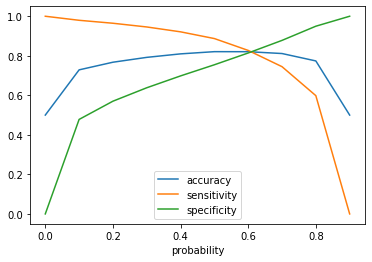

In [177]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

In [178]:
#At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and
#specificity with a good accuracy

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [179]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.124059,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.252999,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.072508,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004169,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000219,4,1,0,0,0,0,0,0,0,0,0,0


## metrics

In [180]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16166  5259]
 [ 2419 19006]]


In [181]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [182]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8208168028004668
Sensitivity:- 0.8870945157526254
Specificity:- 0.7545390898483081


In [183]:
### We have got good accuracy, sensitivity and specificity on the train set prediction.

In [184]:

# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

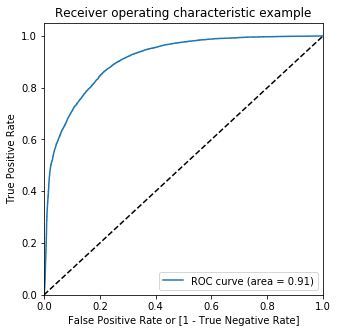

In [185]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [186]:
#ROC curve is closer to 1

### Testing the model on the test set

In [187]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [188]:
X_test_log = X_test_log[log_cols]

In [189]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [190]:
## Predictions on the test set with final model

In [191]:
# Predict on the test set
y_test_pred = log_6.predict(X_test_sm)

In [192]:
y_test_pred.head()

5704     0.007125
64892    0.000048
39613    0.579129
93118    0.053154
81235    0.000434
dtype: float64

In [193]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.007125
64892,0.000048
39613,0.579129
93118,0.053154
81235,0.000434


In [194]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [195]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [196]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [198]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.007125
1,0,64892,0.000048
2,0,39613,0.579129
3,0,93118,0.053154
4,0,81235,0.000434


In [199]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [200]:
y_test_pred_final

,churn,CustID,churn_prob
0,0,5704,0.007125
1,0,64892,0.000048
2,0,39613,0.579129
3,0,93118,0.053154
4,0,81235,0.000434
...,...,...,...
5536,0,28372,0.000348
5537,0,5011,0.041553
5538,0,61092,0.082386
5539,0,21597,0.131932


In [201]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [202]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,5704,0.007125,0
1,0,64892,0.000048,0
2,0,39613,0.579129,1
3,0,93118,0.053154,0
4,0,81235,0.000434,0


In [203]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4006 1342]
 [  33  160]]


In [204]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [205]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.751849846598087
Sensitivity:- 0.8290155440414507
Specificity:- 0.7490650710545999


In [209]:
### model is performing good on the test set

In [210]:
log_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42839
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17389.
Date:                Mon, 07 Jun 2021   Deviance:                       34779.
Time:                        23:23:22   Pearson chi2:                 3.28e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0681      0.023    -46.825      0.000      -1.113      -1.023
onnet_mou_8         -0.1471      0.013    -11.045      0.000      -0.173      -0.121
std_og_t2m_mou_8    -0.0742      0.013     -5.861      0.000      -0.099      -0.049
total_ic_mou_8      -3.5858      0.046    -78.328      0.000      -3.675      -3.496
monthly_2g_6        -0.4521      0.026    -17.100      0.000      -0.504      -0.400
monthly_2g_8        -0.7294      0.040    -18.107      0.000      -0.808      -0.650
sachet_2g_6         -0.0625      0.018     -3.474      0.001      -0.098      -0.027
sachet_2g_8         -0.4565      0.025    -18.524      0.000      -0.505      -0.408
monthly_3g_6        -0.1621      0.022     -7.280      0.000      -0.206      -0.118
monthly_3g_8        -0.8657      0.044    -19.619      0.000      -0.952      -0.779
sachet_3g_8         -0.1963      0.030     -6.461      0.000      -0.256      -0.137
====================================================================================
"""

recommendations
1)Cutomers decreasing monthly 2g usage for August are most probable to churn.

2)Cutomers decreasing monthly 2g usage for June are most probable to churn.

3)Cutomers decreasing monthly 3g usage for June are most probable to churn.

4)Cutomers decreasing monthly 3g usage for August are most probable to churn.

5)Cutomers decreasing total incoming calls and minutes of usage voice calls for August are most probable to churn.

6)if customer is using sachet schemes in the month of june and august then he is most probaly going to churn

### Decision Tree

In [206]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [208]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_resampled_smt,y_resampled_smt)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [211]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.400683,0.157757,0.017576,0.003200,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.958926,0.973162,0.983431,0.980863,0.984831,0.976243,0.009551,1
1,1.458927,0.042303,0.015920,0.000158,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.958926,0.973162,0.983431,0.980863,0.984831,0.976243,0.009551,1
2,1.371541,0.208235,0.022194,0.009581,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.959393,0.969662,0.974329,0.980397,0.982964,0.973349,0.008384,5
3,1.524484,0.130484,0.017586,0.003190,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.959393,0.969662,0.974329,0.980397,0.982964,0.973349,0.008384,5
4,2.378016,0.169733,0.015979,0.000014,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.948425,0.977596,0.982730,0.976429,0.982964,0.973629,0.012875,4
5,2.516738,0.460791,0.019174,0.003921,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.948658,0.977596,0.982730,0.976429,0.982964,0.973676,0.012784,3
6,2.264087,0.204418,0.012796,0.003906,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.954026,0.977130,0.970362,0.974329,0.975029,0.970175,0.008367,7
7,2.443167,0.369073,0.015984,0.005046,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.954026,0.977130,0.970362,0.974329,0.975029,0.970175,0.008367,7


In [212]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.976242707117853
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [213]:
# Model with optimal hyperparameters
dt= DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

dt.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

Prediction on the train set

In [214]:
# Predictions on the train set
y_train_pred = dt.predict(X_resampled_smt)

In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_resampled_smt, y_train_pred)
print(confusion)

[[19743  1682]
 [  462 20963]]


In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [218]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_resampled_smt, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9499649941656942
Sensitivity:- 0.9784364060676779
Specificity:- 0.9214935822637106


Prediction on the test set

In [219]:
# Prediction on the test set
y_test_pred = dt.predict(X_test)

In [220]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4927  421]
 [  35  158]]


In [221]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [222]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9177043854899838
Sensitivity:- 0.8186528497409327
Specificity:- 0.9212789827973074


We can see that decision tree has given us a better model than logisitic regression 

model summary 




train set decison tree:

Accuracy:- 0.9499649941656942

Sensitivity:- 0.9784364060676779

Specificity:- 0.9214935822637106







test set decision tree :

Accuracy:- 0.9177043854899838

Sensitivity:- 0.8186528497409327

Specificity:- 0.9212789827973074







train set logisitic regression:

Accuracy:- 0.8208168028004668

Sensitivity:- 0.8870945157526254

Specificity:- 0.7545390898483081








test set logisitc regression:

Accuracy:- 0.751849846598087

Sensitivity:- 0.8290155440414507

Specificity:- 0.7490650710545999




recommendations 1)Cutomers decreasing monthly 2g usage for August are most probable to churn.

2)Cutomers decreasing monthly 2g usage for June are most probable to churn.

3)Cutomers decreasing monthly 3g usage for June are most probable to churn.

4)Cutomers decreasing monthly 3g usage for August are most probable to churn.

5)Cutomers decreasing total incoming calls and minutes of usage voice calls for August are most probable to churn.

6)if customer is using sachet schemes in the month of june and august then he is most probaly going to churn